# Project on Vehicle Performance Prediction-(Linear Regression with SGD Method)
## Project Abstract:
### Most players in the automotive sector are investing in ML for their marketing efforts, a much smaller group is putting in place incentives and key performance indicators (KPIs) to use more ML and automation. Closing the gap requires a stronger commitment to developing ML capability that is not just useful but also used.
## Problem Statement:
### Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre)

## Dataset Information:
### The data is about the technical specifications of cars. 
### Column Description:
#### Kilometer_per_liter: distance in kilometre travelled per litre
#### cylinders: No of cylinders
#### displacement: displacement
#### horsepower: A horsepower is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors
#### weight: Weight of car
#### acceleration: Acceleration of Car
#### model year: Model Year of the car
#### origin: Country origin
#### car name: Car brand and model name (unique for each instance)

### 1. Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
import sklearn.metrics

### 2. Importing Data:

In [2]:
df=pd.read_csv('data.csv') # Importing the Dataframe

### 3. DF & DP i.e. EDA:

In [3]:
df # Calling the Dataframe

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
df.sample(10) # Getting 10 random rows from the Dataframe

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
386,1,6,181.0,110,2945,16.4,1982,buick century limited,10.628593
156,1,8,400.0,170,4668,11.5,1975,pontiac catalina,6.802299
230,1,8,350.0,170,4165,11.4,1977,chevrolet monte carlo landau,6.589727
120,2,4,121.0,112,2868,15.5,1973,volvo 144ea,8.077730
390,3,4,144.0,96,2665,13.9,1982,toyota celica gt,13.604599
361,3,6,168.0,116,2900,12.6,1981,toyota cressida,10.798650
331,3,4,97.0,67,2145,18.0,1980,subaru dl,14.369857
257,1,6,232.0,90,3210,17.2,1978,amc concord,8.247788
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
94,1,8,440.0,215,4735,11.0,1973,chrysler new yorker brougham,5.526868


In [5]:
df.describe() # Horsepower is missing

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [6]:
df.info() # Getting details on the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.dtypes # Horsepower is object dtype

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

#### Dealing with problem on Horse power

In [8]:
hpProb = pd.DataFrame(df.horsepower.str.isdigit()) # Finding the problematic values in the horse power column
df[hpProb['horsepower']==False]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
32,1,4,98.0,?,2046,19.0,1971,ford pinto,10.628593
126,1,6,200.0,?,2875,17.0,1974,ford maverick,8.928018
330,2,4,85.0,?,1835,17.3,1980,renault lecar deluxe,17.388378
336,1,4,140.0,?,2905,14.3,1980,ford mustang cobra,10.033391
354,2,4,100.0,?,2320,15.8,1981,renault 18i,14.667458
374,1,4,151.0,?,3035,20.5,1982,amc concord dl,9.778305


In [9]:
# Above we have found that '?' is present in some values of horsepower
# Now we have to adjust horsepower
df=df.replace('?',np.nan) # Here we have replaced '?' with 'NaN'

In [10]:
# We have to check
df[hpProb['horsepower']==False]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
32,1,4,98.0,NaN,2046,19.0,1971,ford pinto,10.628593
126,1,6,200.0,NaN,2875,17.0,1974,ford maverick,8.928018
330,2,4,85.0,NaN,1835,17.3,1980,renault lecar deluxe,17.388378
336,1,4,140.0,NaN,2905,14.3,1980,ford mustang cobra,10.033391
354,2,4,100.0,NaN,2320,15.8,1981,renault 18i,14.667458
374,1,4,151.0,NaN,3035,20.5,1982,amc concord dl,9.778305


In [11]:
# Now we have to replace horsepower 'NaN' values with necessary values i.e. mean/median/mode
df.mean()

C:\Users\roshs\AppData\Local\Temp/ipykernel_16368/2571002469.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


origin                    1.572864
cylinders                 5.454774
displacement            193.425879
weight                 2970.424623
acceleration             15.568090
year                   1976.010050
Kilometer_per_liter       9.997073
dtype: float64

In [12]:
# Changing the dtype of horsepower float
df['horsepower']=df['horsepower'].astype('float64')

In [13]:
mean=df.horsepower.mean()
mean # Mean of the horsepower column

104.46938775510205

In [14]:
mode=df.horsepower.mode()
mode # Mode of the horsepower column

0    150.0
dtype: float64

In [15]:
median=df.horsepower.median()
median # Median of the horsepower column

93.5

In [16]:
# Replacing 'NaN' values of horsepower with their median
df['horsepower']=df['horsepower'].fillna(median)

In [17]:
df.describe() # Horsepower problem solved

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,104.304020,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [18]:
# droping unnecessary feature according to the problem statement
df=df.drop('name', axis=1)

In [19]:
df.isnull().sum() # Hence no missing values found

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
Kilometer_per_liter    0
dtype: int64

<AxesSubplot:xlabel='origin', ylabel='Kilometer_per_liter'>

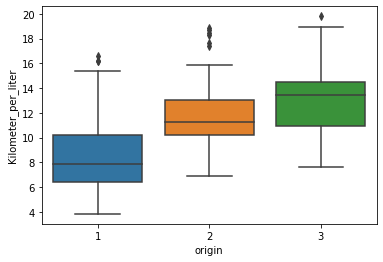

In [20]:
# Checking for Outliers:
sns.boxplot(x="origin",y="Kilometer_per_liter",data=df)

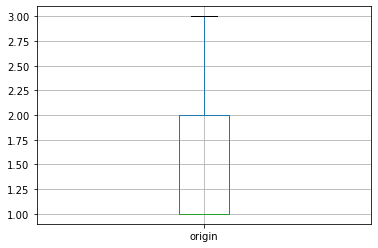

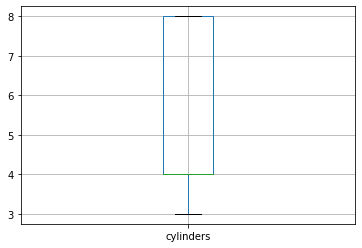

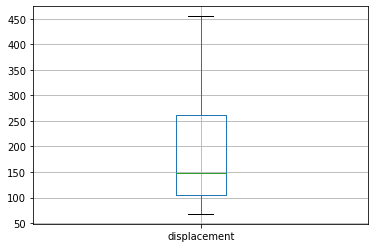

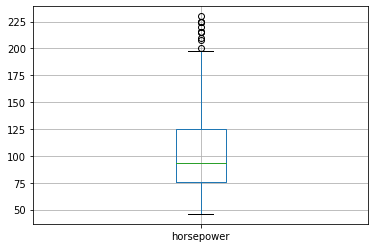

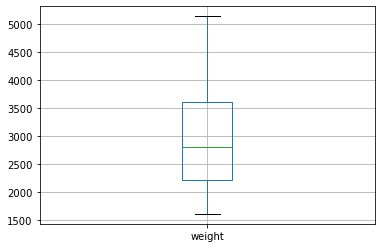

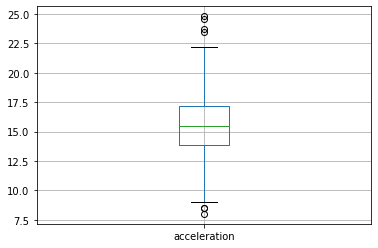

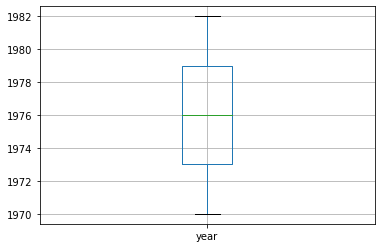

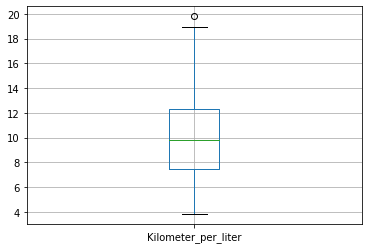

In [21]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

In [22]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  origin
capping the  cylinders
capping the  displacement
capping the  horsepower
capping the  weight
capping the  acceleration
capping the  year
capping the  Kilometer_per_liter


C:\Users\roshs\AppData\Local\Temp/ipykernel_16368/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_16368/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\roshs\AppData\Local\Temp/ipykernel_16368/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

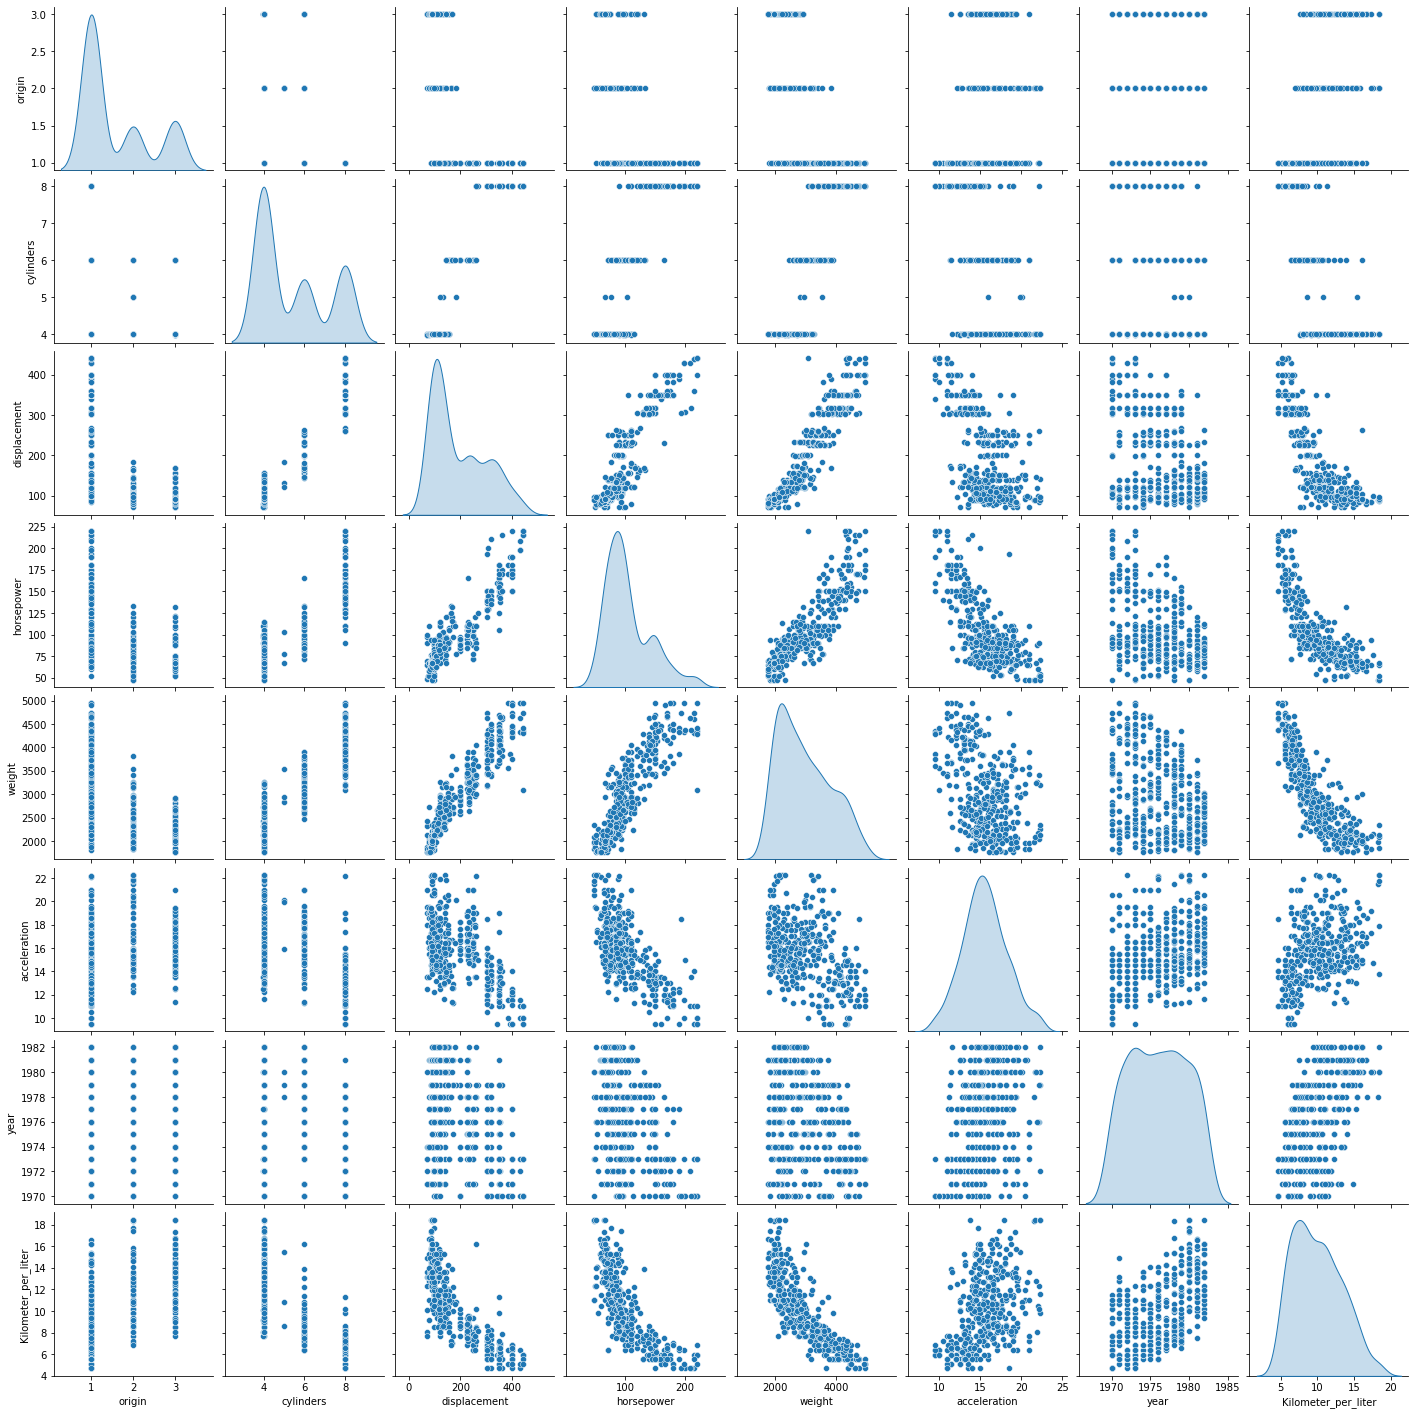

In [23]:
# Visualization of features to check the spread of data:
sns.pairplot(df,diag_kind='kde')

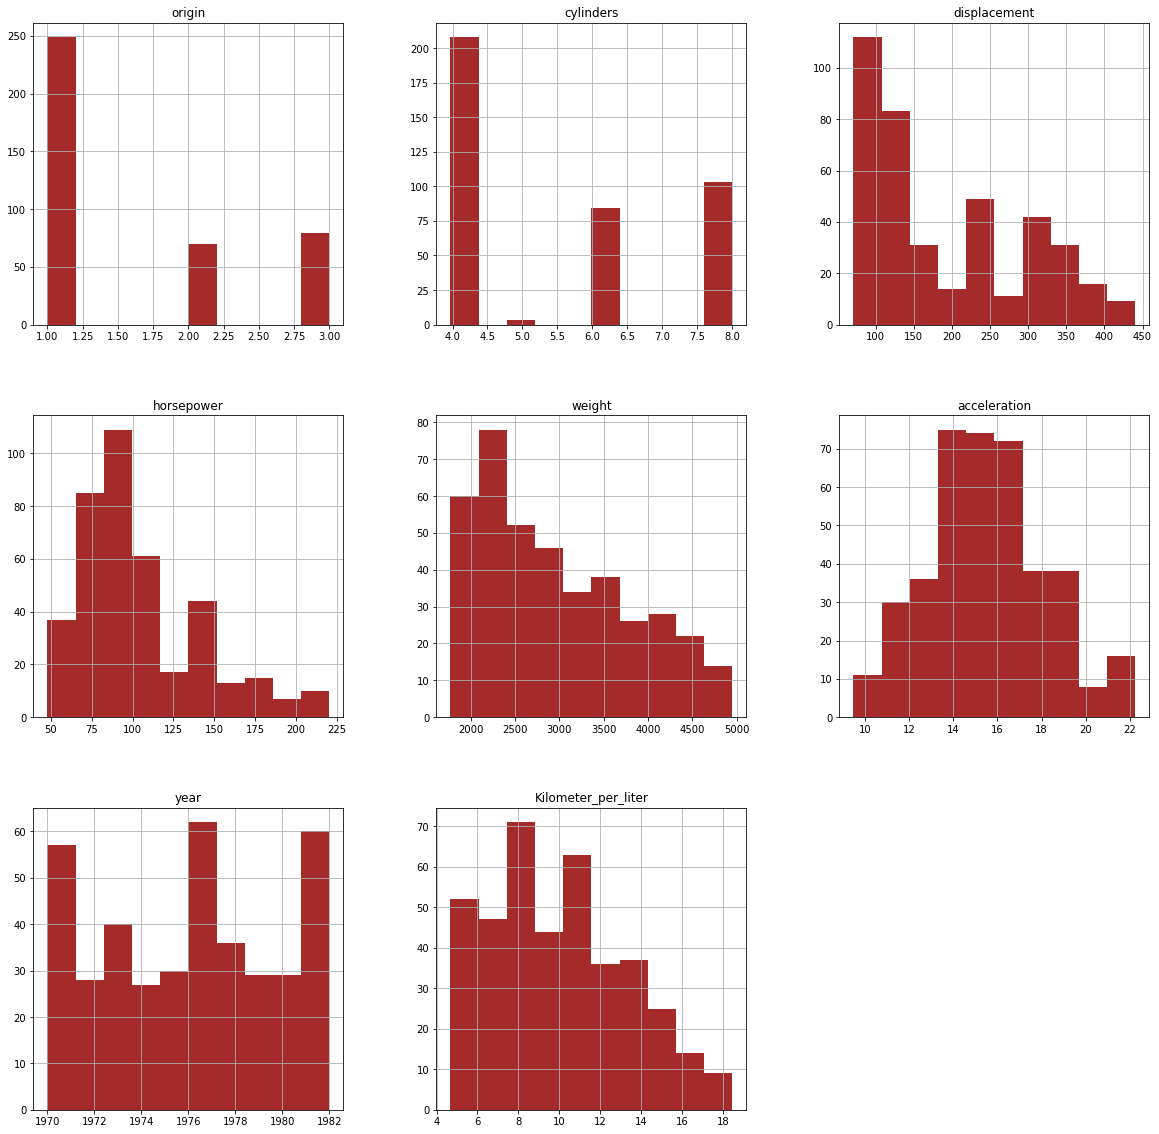

In [24]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

### All columns/features have a unique form of spread, few feature have similar spread of data this represents the correlation between them.

In [25]:
df.describe(include='all')

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.464523,193.296633,104.252764,2970.609447,15.558784,1976.010050,9.995120
std,0.802055,1.689621,103.899621,38.015122,844.190094,2.678834,3.697627,3.298800
min,1.000000,3.970000,70.970000,48.000000,1772.610000,9.485000,1970.000000,4.676581
25%,1.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,440.420000,220.150000,4951.030000,22.239000,1982.000000,18.458889


<AxesSubplot:>

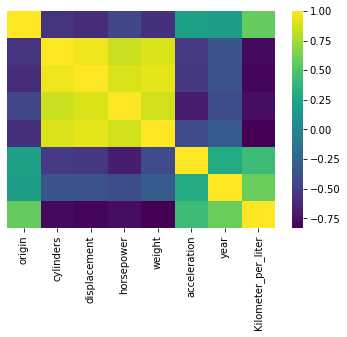

In [26]:
# Visualization of data correlation of original data:
sns.heatmap(df.corr(),yticklabels=False,cmap='viridis')

### DataFrame has a unique form of correlation.

In [27]:
df.info() # Getting details on the Columns present in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    float64
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    float64
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 25.0 KB


### 4. Data Spliting:

In [28]:
x=df.drop(labels=['Kilometer_per_liter'],axis=1)
y=df[['Kilometer_per_liter']]

### 5. Linear Regression Model Build-(SGD):

In [30]:
sgd=SGDRegressor()

### #6.1 Without Scaling:

In [31]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [32]:
# Model Fitting
sgd.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [33]:
# Accuracy Testing
sgdtr=sgd.score(x_train,y_train)
print('Train Score:',sgdtr)
sgdte=sgd.score(x_test,y_test)
print('Test Score: ',sgdte)

Train Score: -7.851884677720623e+29
Test Score:  -7.390503204716229e+29


### We have got negative score in both training and testing data so we will be looking into a different approach.

### #6.2 With Standard Scaling:

In [34]:
# Standard Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.71514478,  1.50250812,  1.09573527, ...,  0.63263228,
        -1.33015456, -1.62742629],
       [-0.71514478,  1.50250812,  1.51011717, ...,  0.8567973 ,
        -1.51703786, -1.62742629],
       [-0.71514478,  1.50250812,  1.20173994, ...,  0.55198032,
        -1.70392116, -1.62742629],
       ...,
       [-0.71514478, -0.86786699, -0.56179231, ..., -0.80131218,
        -1.4796612 ,  1.62198339],
       [-0.71514478, -0.86786699, -0.70634414, ..., -0.40991295,
         1.13670499,  1.62198339],
       [-0.71514478, -0.86786699, -0.71598092, ..., -0.29723741,
         1.43571827,  1.62198339]])

In [35]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [36]:
# Model Fitting
sgd.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [37]:
# Accuracy Testing
sgdtrs=sgd.score(x_train,y_train)
print('Train Score:',sgdtrs)
sgdtes=sgd.score(x_test,y_test)
print('Test Score: ',sgdtes)

Train Score: 0.8198450019323573
Test Score:  0.8097614507973705


### This approach has given us a better positive score we will proceed with other approaches for better score.

### #6.3 With Min Max Scaling:

In [38]:
# Min Max Scaling
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 1.        , 0.63886859, ..., 0.54473292, 0.19719304,
        0.        ],
       [0.        , 1.        , 0.75525782, ..., 0.60419642, 0.15798965,
        0.        ],
       [0.        , 1.        , 0.66864258, ..., 0.52333864, 0.11878626,
        0.        ],
       ...,
       [0.        , 0.00744417, 0.17331168, ..., 0.16435525, 0.16583033,
        1.        ],
       [0.        , 0.00744417, 0.13271079, ..., 0.26818042, 0.71467775,
        1.        ],
       [0.        , 0.00744417, 0.13000406, ..., 0.29806948, 0.77740317,
        1.        ]])

In [39]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [40]:
# Model Fitting
sgd.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [41]:
# Accuracy Testing
sgdtrm=sgd.score(x_train,y_train)
print('Train Score:',sgdtrm)
sgdtem=sgd.score(x_test,y_test)
print('Test Score: ',sgdtem)

Train Score: 0.7883988272006083
Test Score:  0.756233951567058


### This approach has given lesser score than the previous approach, we have check with other scaled technique for better score.

### #6.4 With Robust Scaling:

In [42]:
# Robust Scaling
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        ,  1.        ,  1.00475436, ...,  0.50605021,
        -1.04477612, -1.        ],
       [ 0.        ,  1.        ,  1.27733756, ...,  0.64258624,
        -1.19402985, -1.        ],
       [ 0.        ,  1.        ,  1.07448494, ...,  0.45692613,
        -1.34328358, -1.        ],
       ...,
       [ 0.        ,  0.        , -0.08557845, ..., -0.36734694,
        -1.1641791 ,  1.        ],
       [ 0.        ,  0.        , -0.18066561, ..., -0.1289507 ,
         0.92537313,  1.        ],
       [ 0.        ,  0.        , -0.18700475, ..., -0.06032147,
         1.1641791 ,  1.        ]])

In [43]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [44]:
# Model Fitting
sgd.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [45]:
# Accuracy Testing
sgdtrr=sgd.score(x_train,y_train)
print('Train Score:',sgdtrr)
sgdter=sgd.score(x_test,y_test)
print('Test Score: ',sgdter)

Train Score: 0.8144658469673466
Test Score:  0.7893648617406117


### #6.5 With Polynimial Featuring:

In [46]:
# Polynimial Featuring
from sklearn.preprocessing import PolynomialFeatures
scaler=PolynomialFeatures(degree=2, interaction_only=True)
x_scaled=scaler.fit_transform(x)
x_scaled

array([[1.00000e+00, 1.00000e+00, 8.00000e+00, ..., 4.20480e+04,
        6.90288e+06, 2.36400e+04],
       [1.00000e+00, 1.00000e+00, 8.00000e+00, ..., 4.24695e+04,
        7.27521e+06, 2.26550e+04],
       [1.00000e+00, 1.00000e+00, 8.00000e+00, ..., 3.77960e+04,
        6.76892e+06, 2.16700e+04],
       ...,
       [1.00000e+00, 1.00000e+00, 4.00000e+00, ..., 2.66220e+04,
        4.54869e+06, 2.29912e+04],
       [1.00000e+00, 1.00000e+00, 4.00000e+00, ..., 4.88250e+04,
        5.20275e+06, 3.68652e+04],
       [1.00000e+00, 1.00000e+00, 4.00000e+00, ..., 5.27680e+04,
        5.39104e+06, 3.84508e+04]])

In [47]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [48]:
# Model Fitting
sgd.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [49]:
# Accuracy Testing
sgdtrp=sgd.score(x_train,y_train)
print('Train Score:',sgdtrp)
sgdtep=sgd.score(x_test,y_test)
print('Test Score: ',sgdtep)

Train Score: -1.335403524949018e+42
Test Score:  -1.245565737498099e+42


### This approach has given us with a negative score, we will proceed to conclusion segment for further considerations.

### 7. Conclusion:

In [50]:
print('SGD Linear Regression Model Without Scaling:')
print('Train Score:',sgdtr)
print('Test Score: ',sgdte)
print('SGD Linear Regression Model With Standard Scaling:')
print('Train Score:',sgdtrs)
print('Test Score: ',sgdtes)
print('SGD Linear Regression Model With Min Max Scaling:')
print('Train Score:',sgdtrm)
print('Test Score: ',sgdtem)
print('SGD Linear Regression Model With Robust Scaling:')
print('Train Score:',sgdtrr)
print('Test Score: ',sgdter)
print('SGD Linear Regression Model With Polynimial Featuring:')
print('Train Score:',sgdtrp)
print('Test Score: ',sgdtep)

SGD Linear Regression Model Without Scaling:
Train Score: -7.851884677720623e+29
Test Score:  -7.390503204716229e+29
SGD Linear Regression Model With Standard Scaling:
Train Score: 0.8198450019323573
Test Score:  0.8097614507973705
SGD Linear Regression Model With Min Max Scaling:
Train Score: 0.7883988272006083
Test Score:  0.756233951567058
SGD Linear Regression Model With Robust Scaling:
Train Score: 0.8144658469673466
Test Score:  0.7893648617406117
SGD Linear Regression Model With Polynimial Featuring:
Train Score: -1.335403524949018e+42
Test Score:  -1.245565737498099e+42


# Conclusion:
## By considers all the approaches we have done we have come to a conclution to go with the SGD Linear Regression Model With Standard Scaling, since it gives the overall best score.